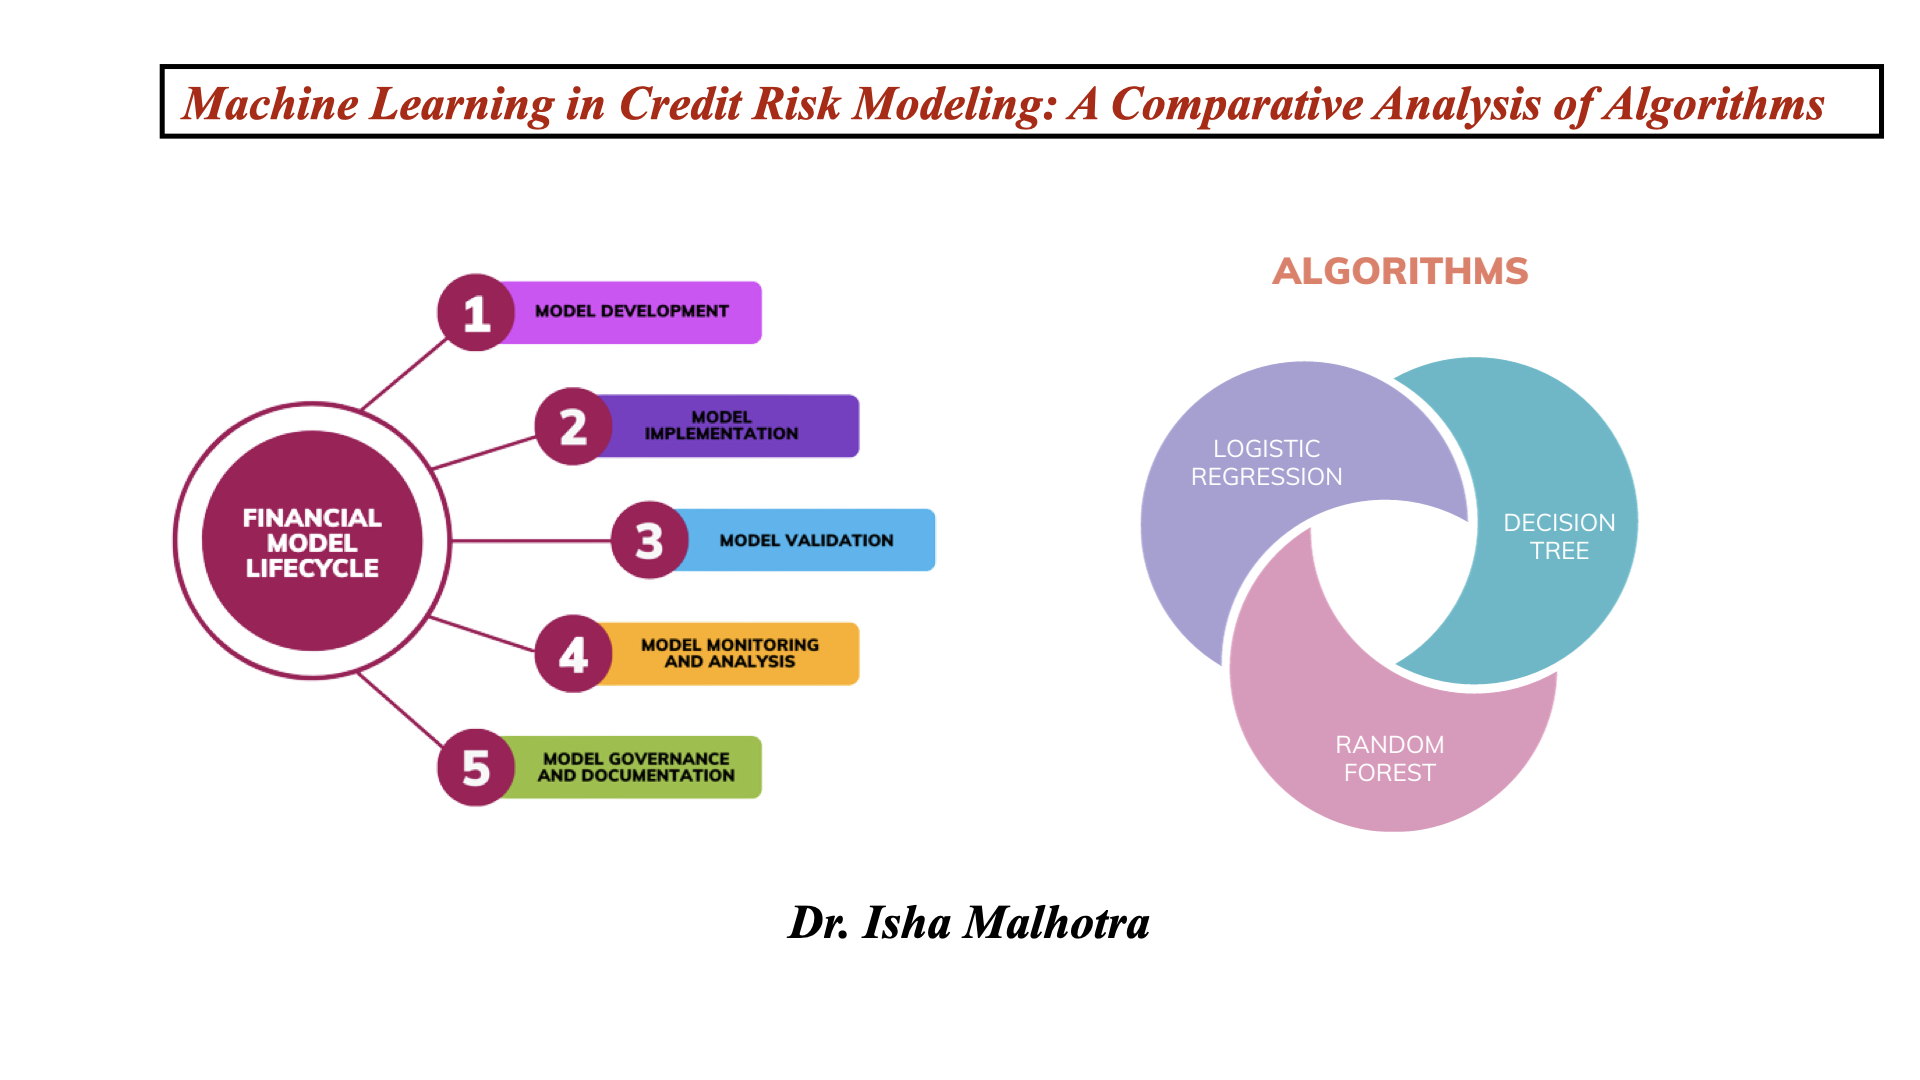

# Problem Statement
A bank has collected data about historical loan default along with respective information for each member.

Our aim is to forge a formidable predictive model, one that empowers this institution to forecast of a member's default.

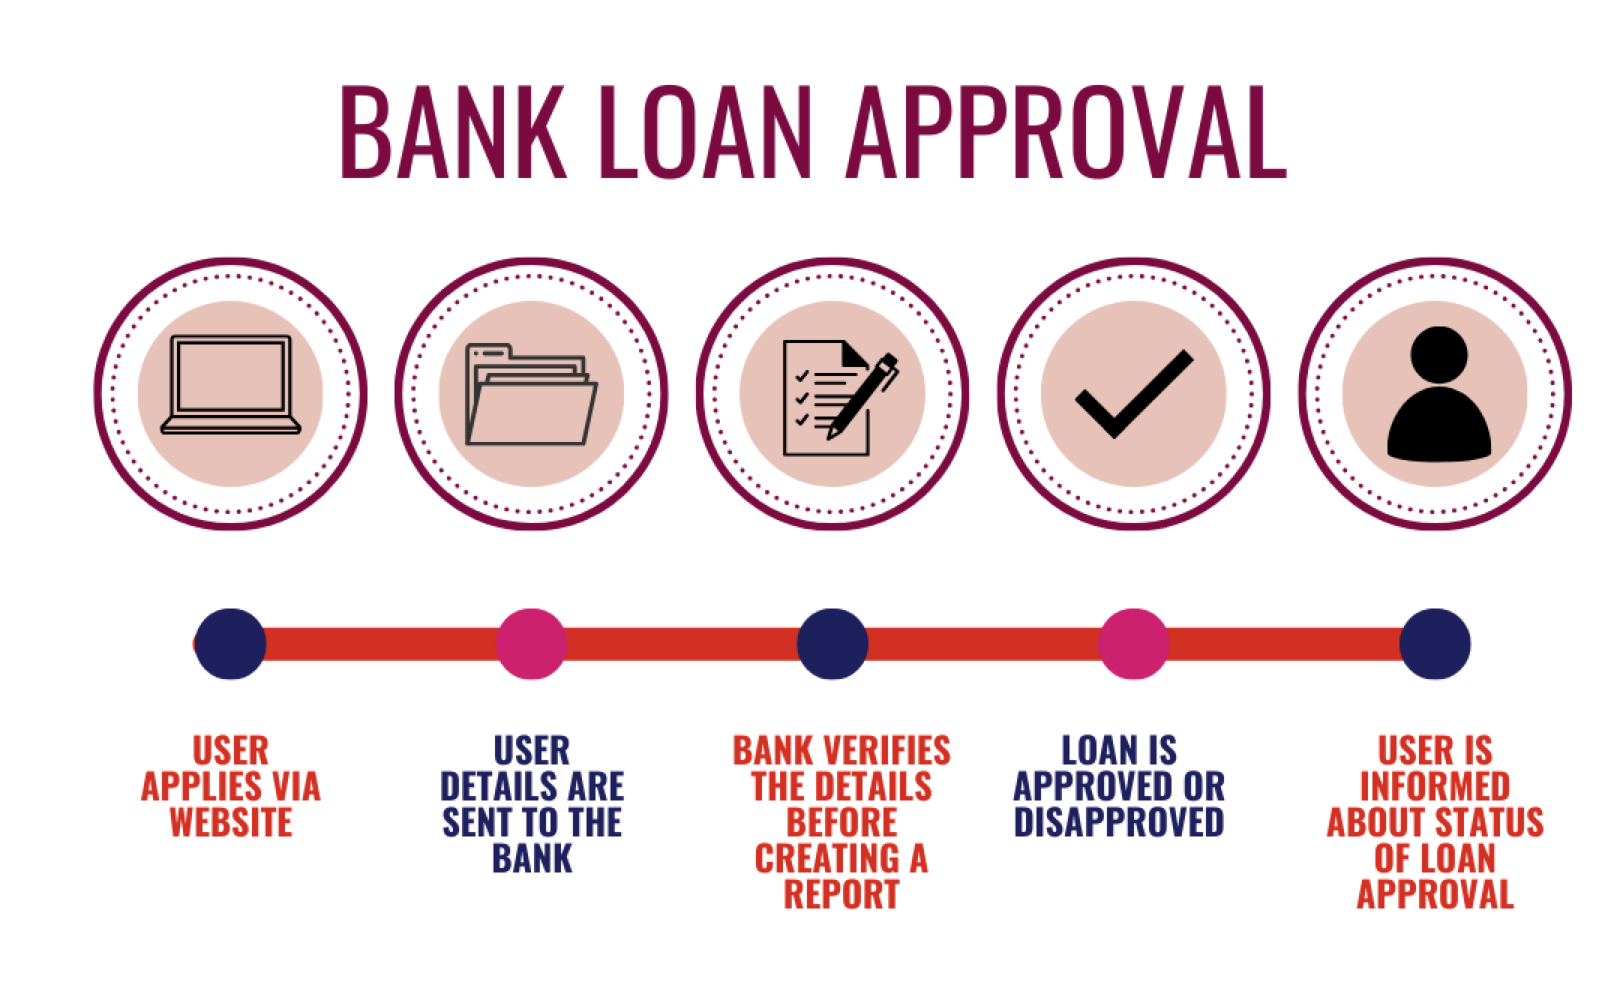

In [3]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
data = pd.read_csv('Load_Data.csv')
data_rows, data_cols = data.shape
data.head(5)

<ipython-input-4-3c0f779baae6>:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Load_Data.csv')


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,6068856,10000,10000,10000.0,36 months,BAT2428731,13.11,B,B4,Desert Christian School,...,0.0,44.0,INDIVIDUAL,NaN,139th week,0.0,0.0,10581.0,22600.0,0
1,47022153,23400,23400,23400.0,60 months,BAT4136152,22.99,F,F1,Senior Desktop Support Specialist,...,0.0,NaN,INDIVIDUAL,NaN,39th week,0.0,0.0,48710.0,48000.0,0
2,58669830,10000,10000,10000.0,36 months,BAT3873588,9.99,B,B3,Distribution Tech,...,0.0,NaN,INDIVIDUAL,NaN,26th week,0.0,0.0,25770.0,14800.0,0
3,63475668,6500,6500,6425.0,36 months,BAT4271519,15.61,D,D1,Sales Representative,...,0.0,NaN,INDIVIDUAL,NaN,4th week,0.0,0.0,44810.0,8100.0,1
4,49574009,11000,11000,11000.0,36 months,BAT1104812,12.69,C,C2,Account supervisor,...,0.0,NaN,INDIVIDUAL,NaN,39th week,0.0,394.0,11853.0,10000.0,0


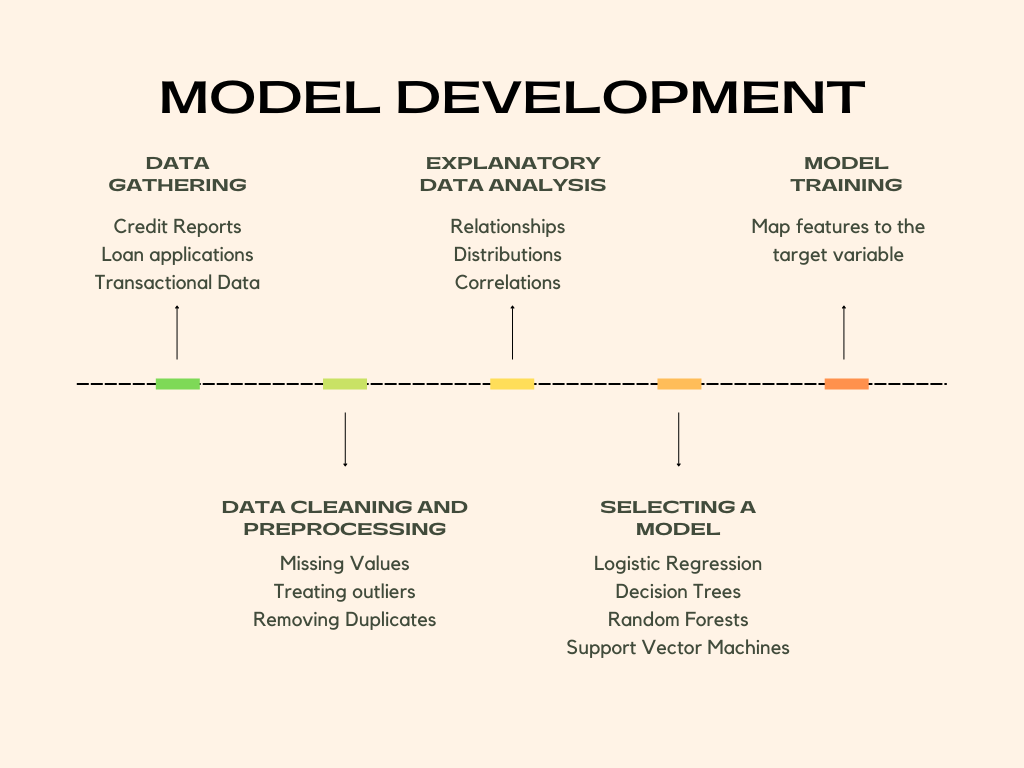

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262428 entries, 0 to 262427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    262428 non-null  int64  
 1   loan_amnt                    262428 non-null  int64  
 2   funded_amnt                  262428 non-null  int64  
 3   funded_amnt_inv              262428 non-null  float64
 4   term                         262428 non-null  object 
 5   batch_enrolled               168075 non-null  object 
 6   int_rate                     262428 non-null  float64
 7   grade                        262428 non-null  object 
 8   sub_grade                    262428 non-null  object 
 9   emp_title                    247220 non-null  object 
 10  emp_length                   249167 non-null  object 
 11  home_ownership               262428 non-null  object 
 12  annual_inc                   262427 non-null  float64
 13 

<AxesSubplot:xlabel='loan_status', ylabel='count'>

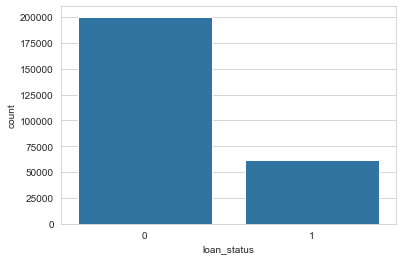

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',data=data)

# Treating Missing Values

In [7]:
Missing_Categories=[var for var in data.columns if data[var].isnull().sum()>0 and data[var].dtypes=='O']
for X in Missing_Categories:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,data[X].isnull().sum(),(data[X].isnull().sum()/data_rows)*100 ))

number and % of missing record for batch_enrolled are 94353 and 35.95386163061868% respectively
number and % of missing record for emp_title are 15208 and 5.795113326321887% respectively
number and % of missing record for emp_length are 13261 and 5.0531955431585045% respectively
number and % of missing record for desc are 225208 and 85.81706220372826% respectively
number and % of missing record for title are 48 and 0.0182907311719786% respectively
number and % of missing record for verification_status_joint are 262264 and 99.93750666849573% respectively


In [8]:
data=data.drop(['member_id','batch_enrolled','verification_status_joint','desc'],axis=1)

In [9]:
# Filling all missing values with mode

keys=['emp_title',
 'emp_length',
 'title']
for i in [0,1,2]:
    data[keys[i]].fillna(data[keys[i]].mode()[0],inplace=True)

In [10]:
Missing_Numerical=[var for var in data.describe().columns if (data[var].isnull().sum()>0 and (data[var].dtypes=='float64' or data[var].dtypes=='int64'))]
for X in Missing_Numerical:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,data[X].isnull().sum(),(data[X].isnull().sum()/data_rows)*100 ))

number and % of missing record for annual_inc are 1 and 0.00038105689941622087% respectively
number and % of missing record for delinq_2yrs are 10 and 0.0038105689941622086% respectively
number and % of missing record for inq_last_6mths are 10 and 0.0038105689941622086% respectively
number and % of missing record for mths_since_last_delinq are 134052 and 51.08143948054323% respectively
number and % of missing record for mths_since_last_record are 221594 and 84.43992256923804% respectively
number and % of missing record for open_acc are 10 and 0.0038105689941622086% respectively
number and % of missing record for pub_rec are 10 and 0.0038105689941622086% respectively
number and % of missing record for revol_util are 139 and 0.052966909018854695% respectively
number and % of missing record for total_acc are 10 and 0.0038105689941622086% respectively
number and % of missing record for collections_12_mths_ex_med are 53 and 0.020196015669059705% respectively
number and % of missing record f

In [11]:
data=data.drop(['mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_last_delinq'],axis=1)

In [12]:
keys=['annual_inc',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

for i in range (len(keys)):
    data[keys[i]].fillna(data[keys[i]].median(),inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262428 entries, 0 to 262427
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   262428 non-null  int64  
 1   funded_amnt                 262428 non-null  int64  
 2   funded_amnt_inv             262428 non-null  float64
 3   term                        262428 non-null  object 
 4   int_rate                    262428 non-null  float64
 5   grade                       262428 non-null  object 
 6   sub_grade                   262428 non-null  object 
 7   emp_title                   262428 non-null  object 
 8   emp_length                  262428 non-null  object 
 9   home_ownership              262428 non-null  object 
 10  annual_inc                  262428 non-null  float64
 11  verification_status         262428 non-null  object 
 12  pymnt_plan                  262428 non-null  object 
 13  purpose       

# Converting Non-numeric colums to numeric using WOE Encoding


$\text{WoE} = \ln \left( \frac{{\% \text{ of non-events with variable value}}}{{\% \text{ of events with variable value}}} \right)$


pip install --upgrade category_encoders

In [14]:
import category_encoders as ce

data_categorical = data.select_dtypes(include=['object'])
train_targets = data['loan_status']
train_features = data_categorical

columns = [col for col in data.columns if data[col].dtypes=='O']
woe_encoder = ce.WOEEncoder(cols=columns)
woe_encoded_train = woe_encoder.fit_transform(train_features[columns], train_targets).add_suffix('_woe')
train_features = train_features.join(woe_encoded_train)
data_categorical_woe = woe_encoded_train

woe_encoded_cols = woe_encoded_train.columns

In [15]:
data_categorical_woe

,term_woe,grade_woe,sub_grade_woe,emp_title_woe,emp_length_woe,home_ownership_woe,verification_status_woe,pymnt_plan_woe,purpose_woe,title_woe,zip_code_woe,addr_state_woe,initial_list_status_woe,application_type_woe,last_week_pay_woe
0,0.190545,0.141261,0.141128,0.000000,0.218226,0.020427,0.235446,-0.000017,-0.025352,-0.630392,0.393034,0.221174,0.473073,0.000786,0.483085
1,-0.546799,-0.156318,-0.153451,0.000000,-0.130842,0.020427,0.096288,-0.000017,-0.025352,-0.630392,-0.024880,-0.001998,0.473073,0.000786,-0.237372
2,0.190545,0.141261,0.239885,0.000000,-0.037478,0.013844,-0.315420,-0.000017,0.048939,-0.638093,0.162973,0.221174,-0.684009,0.000786,-0.551009
3,0.190545,-0.110949,-0.129584,-0.255302,-0.130842,0.020427,0.096288,-0.000017,-0.025352,-0.630392,-0.555653,-0.513856,0.473073,0.000786,-0.396339
4,0.190545,-0.106779,-0.030414,0.000000,-0.130842,0.020427,-0.315420,-0.000017,-0.025352,-0.630392,0.297041,0.221174,-0.684009,0.000786,-0.237372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262423,0.190545,0.141261,0.072187,-0.798001,-0.130842,0.013844,-0.315420,-0.000017,-0.025352,-0.630392,-0.123275,-0.140079,0.473073,0.000786,-0.327790
262424,-0.546799,-0.106779,-0.130477,-0.618567,-0.130842,0.013844,0.235446,-0.000017,-0.025352,-0.630392,-0.428810,-0.140079,-0.684009,0.000786,0.157906
262425,-0.546799,-0.288376,-0.308136,1.866340,-0.114978,0.020427,0.096288,-0.000017,-0.025352,-0.630392,-0.639792,-0.621882,0.473073,0.000786,-0.910706
262426,-0.546799,-0.110949,-0.030435,-0.851189,0.066668,0.020427,-0.315420,-0.000017,-0.173721,-0.838413,0.091675,-0.142905,-0.684009,0.000786,-0.099668


In [16]:
data_numerical = data.select_dtypes(include=['float64', 'int64'])
data_numerical
X_annual_inc = data_numerical['annual_inc'].copy()

In [17]:
data_cleaned = pd.concat([data_categorical_woe, data_numerical], axis=1)
data_cleaned.head(5).transpose()

,0,1,2,3,4
term_woe,0.190545,-0.546799,0.190545,0.190545,0.190545
grade_woe,0.141261,-0.156318,0.141261,-0.110949,-0.106779
sub_grade_woe,0.141128,-0.153451,0.239885,-0.129584,-0.030414
emp_title_woe,0.000000,0.000000,0.000000,-0.255302,0.000000
emp_length_woe,0.218226,-0.130842,-0.037478,-0.130842,-0.130842
home_ownership_woe,0.020427,0.020427,0.013844,0.020427,0.020427
verification_status_woe,0.235446,0.096288,-0.315420,0.096288,-0.315420
pymnt_plan_woe,-0.000017,-0.000017,-0.000017,-0.000017,-0.000017
purpose_woe,-0.025352,-0.025352,0.048939,-0.025352,-0.025352
title_woe,-0.630392,-0.630392,-0.638093,-0.630392,-0.630392


# Treating Outliers

In [18]:
for col in data_numerical.columns:
    percentiles = data_numerical[col].quantile([0.01, 0.99]).values
    data_numerical.loc[data_numerical[col] <= percentiles[0], col] = percentiles[0]
    data_numerical.loc[data_numerical[col] >= percentiles[1], col] = percentiles[1]
    

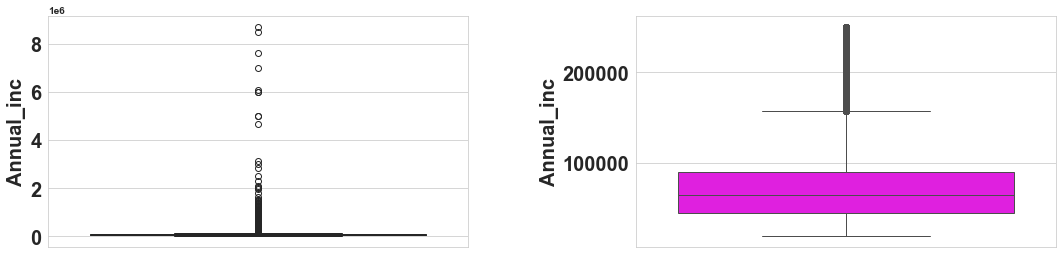

In [19]:
from matplotlib import rcParams

rcParams['font.weight'] = 'bold'

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10, 4))
fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
sns.boxplot(X_annual_inc, orient='v' , ax=ax[0],color='green')

sns.boxplot(data_numerical["annual_inc"], orient='v' , ax=ax[1], color='magenta')

ax[0].set_ylabel('Annual_inc',size=20,weight='bold')
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)

ax[1].set_ylabel('Annual_inc',size=20,weight='bold')
ax[1].tick_params(axis='x', labelsize=20)
ax[1].tick_params(axis='y', labelsize=20)




plt.show()

In [20]:
data_cleaned

,term_woe,grade_woe,sub_grade_woe,emp_title_woe,emp_length_woe,home_ownership_woe,verification_status_woe,pymnt_plan_woe,purpose_woe,title_woe,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,0.190545,0.141261,0.141128,0.000000,0.218226,0.020427,0.235446,-0.000017,-0.025352,-0.630392,...,2112.48,0.0,0.0,0.0,0.0,0.0,0.0,10581.0,22600.0,0
1,-0.546799,-0.156318,-0.153451,0.000000,-0.130842,0.020427,0.096288,-0.000017,-0.025352,-0.630392,...,3852.48,0.0,0.0,0.0,0.0,0.0,0.0,48710.0,48000.0,0
2,0.190545,0.141261,0.239885,0.000000,-0.037478,0.013844,-0.315420,-0.000017,0.048939,-0.638093,...,458.17,0.0,0.0,0.0,0.0,0.0,0.0,25770.0,14800.0,0
3,0.190545,-0.110949,-0.129584,-0.255302,-0.130842,0.020427,0.096288,-0.000017,-0.025352,-0.630392,...,62.01,0.0,0.0,0.0,0.0,0.0,0.0,44810.0,8100.0,1
4,0.190545,-0.106779,-0.030414,0.000000,-0.130842,0.020427,-0.315420,-0.000017,-0.025352,-0.630392,...,846.42,0.0,0.0,0.0,0.0,0.0,394.0,11853.0,10000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262423,0.190545,0.141261,0.072187,-0.798001,-0.130842,0.013844,-0.315420,-0.000017,-0.025352,-0.630392,...,2595.45,0.0,0.0,0.0,0.0,0.0,0.0,83087.0,24800.0,0
262424,-0.546799,-0.106779,-0.130477,-0.618567,-0.130842,0.013844,0.235446,-0.000017,-0.025352,-0.630392,...,2182.92,0.0,0.0,0.0,0.0,0.0,0.0,227812.0,17800.0,0
262425,-0.546799,-0.288376,-0.308136,1.866340,-0.114978,0.020427,0.096288,-0.000017,-0.025352,-0.630392,...,645.32,0.0,0.0,0.0,0.0,0.0,0.0,26010.0,24200.0,1
262426,-0.546799,-0.110949,-0.030435,-0.851189,0.066668,0.020427,-0.315420,-0.000017,-0.173721,-0.838413,...,4619.79,0.0,0.0,0.0,0.0,0.0,0.0,29197.0,23300.0,0


# Removing columns which have less Information Value (IV)

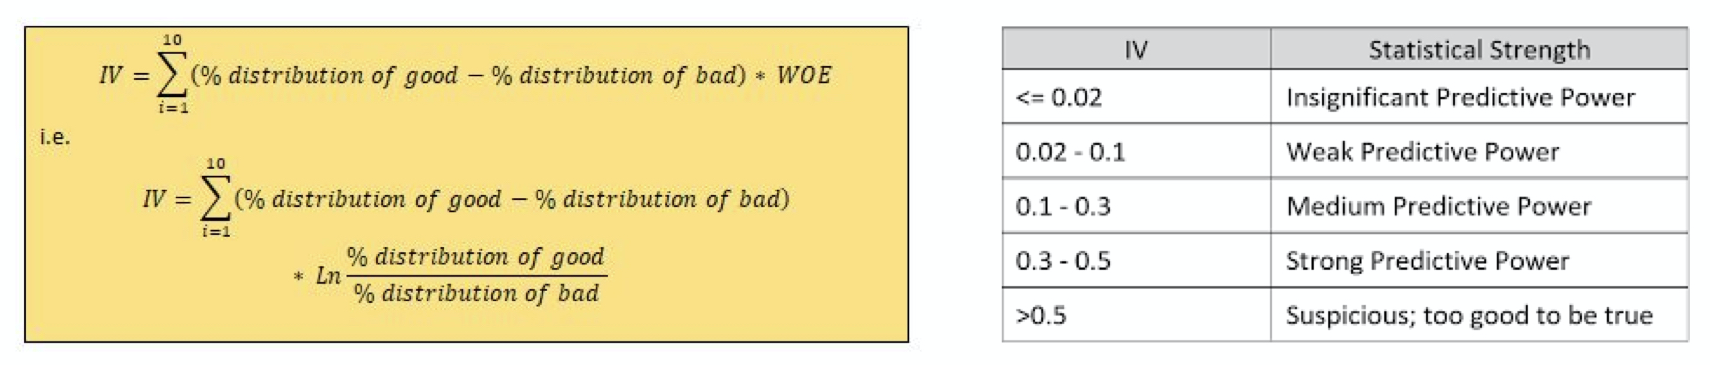

In [21]:
non_cor_vars_list=data_cleaned.columns.tolist()

# define a binning function
def iv_woe(data, target,bins, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
   
    
    #Run WOE and IV on all the independent variables
    for ivars in cols:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
#             binned_x = data.groupby('Industry_Class')[ivars].transform(lambda x : pd.qcut(x, bins, duplicates='drop',labels=None))

            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF



iv, woe = iv_woe(data = data_cleaned, target = 'loan_status', bins=10, show_woe = False)



Information value of term_woe is 0.103311
Information value of grade_woe is 0.02235
Information value of sub_grade_woe is 0.027823
Information value of emp_title_woe is 0.686278
Information value of emp_length_woe is 0.014118
Information value of home_ownership_woe is 0.005041
Information value of verification_status_woe is 0.054622
Information value of pymnt_plan_woe is 3e-06
Information value of purpose_woe is 0.027654
Information value of title_woe is 0.791317
Information value of zip_code_woe is 0.047984
Information value of addr_state_woe is 0.021415
Information value of initial_list_status_woe is 0.315159
Information value of application_type_woe is 0.003126
Information value of last_week_pay_woe is 0.778703
Information value of loan_amnt is 0.055411
Information value of funded_amnt is 0.057447
Information value of funded_amnt_inv is 0.061959
Information value of int_rate is 0.027118
Information value of annual_inc is 0.001538
Information value of dti is 0.109829
Information valu

In [22]:
iv = iv[:-1]

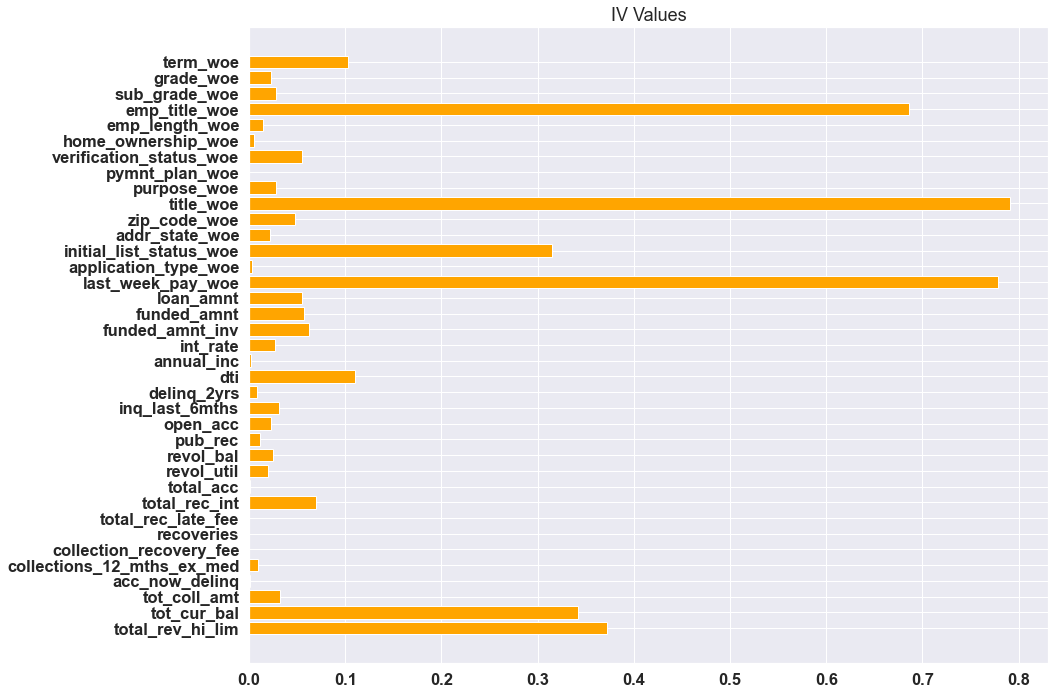

In [23]:
sns.set(font_scale=1.5)
fig,ax = plt.subplots(figsize=(15, 10)) 
plt.barh(iv.Variable, iv.IV, color = 'orange')
plt.title('IV Values')
ax.invert_yaxis() 
plt.tight_layout()
plt.show()


In [24]:
woe

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,term_woe,-0.546799,78597,11936,0.192501,66661,0.332602,-0.546846,0.076614
1,term_woe,0.190545,183831,50069,0.807499,133762,0.667398,0.190555,0.026697
0,grade_woe,-0.288376,21132,3977,0.064140,17155,0.085594,-0.288547,0.006190
1,grade_woe,-0.156318,6751,1412,0.022772,5339,0.026639,-0.156816,0.000606
2,grade_woe,-0.110949,41147,8922,0.143892,32225,0.160785,-0.111007,0.001875
...,...,...,...,...,...,...,...,...,...
7,total_rev_hi_lim,"(33600.0, 43100.0]",26144,4768,0.076897,21376,0.106654,-0.327127,0.009734
8,total_rev_hi_lim,"(43100.0, 60300.0]",26138,4591,0.074042,21547,0.107508,-0.372924,0.012480
9,total_rev_hi_lim,"(60300.0, 9999999.0]",26177,4421,0.071301,21756,0.108550,-0.420309,0.015656
0,loan_status,0,200423,0,0.000008,200423,1.000000,-11.728117,11.728023


In [25]:
iv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 0 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variable  37 non-null     object 
 1   IV        37 non-null     float64
dtypes: float64(1), object(1)
memory usage: 888.0+ bytes


In [26]:
above_threshold = iv[iv["IV"] > 0.04]
Variables = above_threshold['Variable'].to_list()


In [27]:
data_IV = data_cleaned[Variables]

In [28]:
data_IV

,term_woe,emp_title_woe,verification_status_woe,title_woe,zip_code_woe,initial_list_status_woe,last_week_pay_woe,loan_amnt,funded_amnt,funded_amnt_inv,dti,total_rec_int,tot_cur_bal,total_rev_hi_lim
0,0.190545,0.000000,0.235446,-0.630392,0.393034,0.473073,0.483085,10000,10000,10000.0,15.59,2112.48,10581.0,22600.0
1,-0.546799,0.000000,0.096288,-0.630392,-0.024880,0.473073,-0.237372,23400,23400,23400.0,27.85,3852.48,48710.0,48000.0
2,0.190545,0.000000,-0.315420,-0.638093,0.162973,-0.684009,-0.551009,10000,10000,10000.0,18.83,458.17,25770.0,14800.0
3,0.190545,-0.255302,0.096288,-0.630392,-0.555653,0.473073,-0.396339,6500,6500,6425.0,21.75,62.01,44810.0,8100.0
4,0.190545,0.000000,-0.315420,-0.630392,0.297041,-0.684009,-0.237372,11000,11000,11000.0,19.54,846.42,11853.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262423,0.190545,-0.798001,-0.315420,-0.630392,-0.123275,0.473073,-0.327790,20000,20000,20000.0,14.53,2595.45,83087.0,24800.0
262424,-0.546799,-0.618567,0.235446,-0.630392,-0.428810,-0.684009,0.157906,12000,12000,12000.0,22.97,2182.92,227812.0,17800.0
262425,-0.546799,1.866340,0.096288,-0.630392,-0.639792,0.473073,-0.910706,18725,18725,18725.0,27.27,645.32,26010.0,24200.0
262426,-0.546799,-0.851189,-0.315420,-0.838413,0.091675,-0.684009,-0.099668,21000,21000,21000.0,14.91,4619.79,29197.0,23300.0


# Finding Correlations

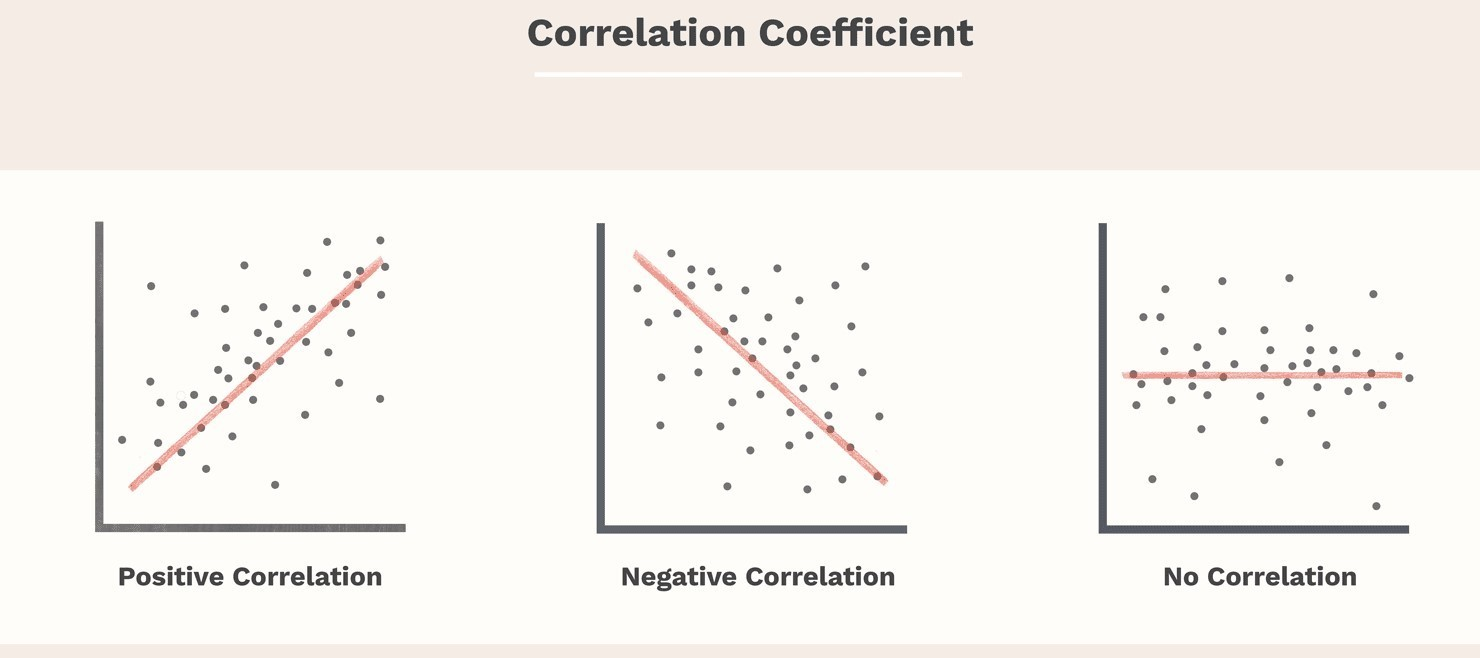

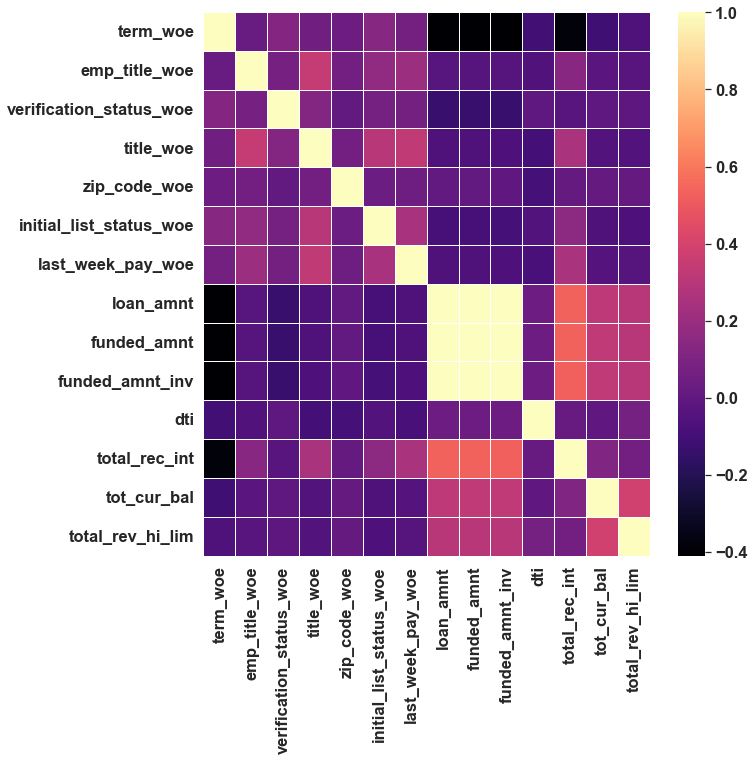

In [29]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(data_IV.corr(), ax=ax, annot=False , linewidths=0.05,cmap="magma") # the color intensity is based on 
sns.set(font_scale=2.5)
plt.show()

In [30]:
## VIF Calculation and setting threshhold at 4 and eliminating variables one after another untill max VIF becomes less than the threshol

from statsmodels.stats.outliers_influence import variance_inflation_factor   
X= data_IV.copy()

def calculate_vif_(X, thresh):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) >= thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc) + 
                 '\' with VIF_Value:' + str(max(vif)))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return pd.DataFrame(X.iloc[:, variables])

df_vif_checked = calculate_vif_(X, thresh=5.0)
non_cor_vars_list=df_vif_checked.columns.tolist()

dropping 'funded_amnt' at index: 8' with VIF_Value:4434.210272781062
dropping 'funded_amnt_inv' at index: 8' with VIF_Value:750.0426478340784
dropping 'loan_amnt' at index: 7' with VIF_Value:6.188377388689147
Remaining variables:
Index(['term_woe', 'emp_title_woe', 'verification_status_woe', 'title_woe',
       'zip_code_woe', 'initial_list_status_woe', 'last_week_pay_woe', 'dti',
       'total_rec_int', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


In [31]:
data_noncorr = data_IV[non_cor_vars_list]

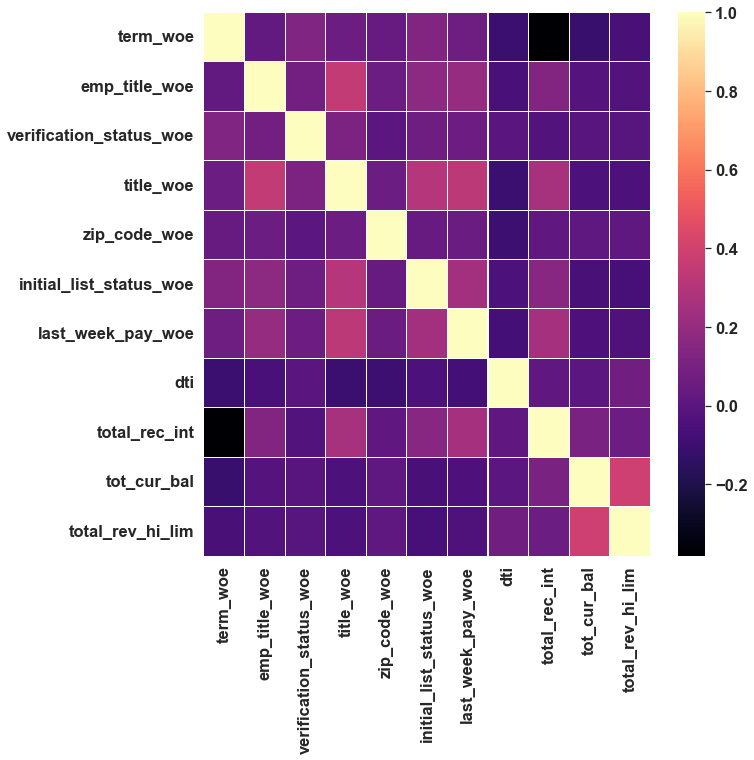

In [32]:
sns.set(font_scale=1.5)
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(data_noncorr.corr(), ax=ax, annot=False ,linewidths=0.05,cmap="magma")
plt.show()

# Dealing with Imbalanced Data Using SMOTE

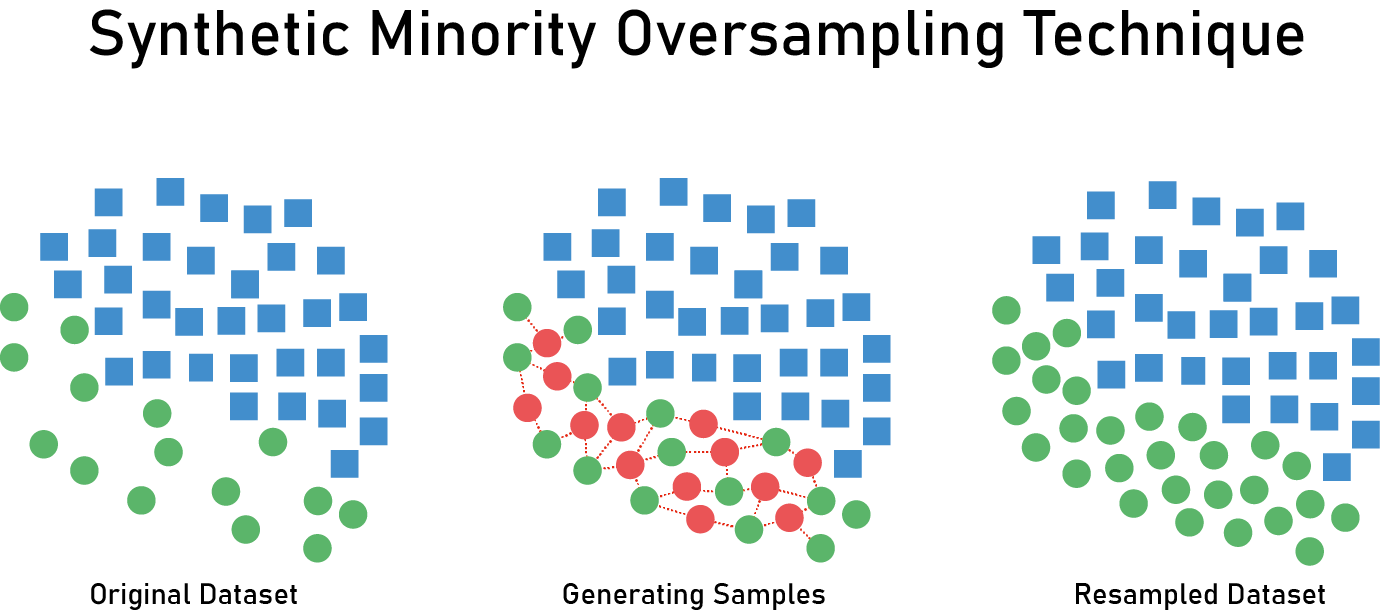

In [33]:
data_noncorr.head()

,term_woe,emp_title_woe,verification_status_woe,title_woe,zip_code_woe,initial_list_status_woe,last_week_pay_woe,dti,total_rec_int,tot_cur_bal,total_rev_hi_lim
0,0.190545,0.000000,0.235446,-0.630392,0.393034,0.473073,0.483085,15.59,2112.48,10581.0,22600.0
1,-0.546799,0.000000,0.096288,-0.630392,-0.024880,0.473073,-0.237372,27.85,3852.48,48710.0,48000.0
2,0.190545,0.000000,-0.315420,-0.638093,0.162973,-0.684009,-0.551009,18.83,458.17,25770.0,14800.0
3,0.190545,-0.255302,0.096288,-0.630392,-0.555653,0.473073,-0.396339,21.75,62.01,44810.0,8100.0
4,0.190545,0.000000,-0.315420,-0.630392,0.297041,-0.684009,-0.237372,19.54,846.42,11853.0,10000.0


In [34]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [35]:
X = data_noncorr.iloc[:,:]
y = data.iloc[:,-1]


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=1)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [41]:
data_noncorr

,term_woe,emp_title_woe,verification_status_woe,title_woe,zip_code_woe,initial_list_status_woe,last_week_pay_woe,dti,total_rec_int,tot_cur_bal,total_rev_hi_lim
0,0.190545,0.000000,0.235446,-0.630392,0.393034,0.473073,0.483085,15.59,2112.48,10581.0,22600.0
1,-0.546799,0.000000,0.096288,-0.630392,-0.024880,0.473073,-0.237372,27.85,3852.48,48710.0,48000.0
2,0.190545,0.000000,-0.315420,-0.638093,0.162973,-0.684009,-0.551009,18.83,458.17,25770.0,14800.0
3,0.190545,-0.255302,0.096288,-0.630392,-0.555653,0.473073,-0.396339,21.75,62.01,44810.0,8100.0
4,0.190545,0.000000,-0.315420,-0.630392,0.297041,-0.684009,-0.237372,19.54,846.42,11853.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...
262423,0.190545,-0.798001,-0.315420,-0.630392,-0.123275,0.473073,-0.327790,14.53,2595.45,83087.0,24800.0
262424,-0.546799,-0.618567,0.235446,-0.630392,-0.428810,-0.684009,0.157906,22.97,2182.92,227812.0,17800.0
262425,-0.546799,1.866340,0.096288,-0.630392,-0.639792,0.473073,-0.910706,27.27,645.32,26010.0,24200.0
262426,-0.546799,-0.851189,-0.315420,-0.838413,0.091675,-0.684009,-0.099668,14.91,4619.79,29197.0,23300.0


In [42]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 5, sampling_strategy=1.0) 
X_smote, y_smote = sm.fit_resample(X_train, y_train.ravel())

In [47]:
print(y_train.value_counts())
unique_values, counts = np.unique(y_smote, return_counts=True)
print(unique_values, counts)

loan_status
0    170378
1     52685
Name: count, dtype: int64
[0 1] [170378 170378]


# Comparative Analysis of Algorithms.

# Logistic Regression

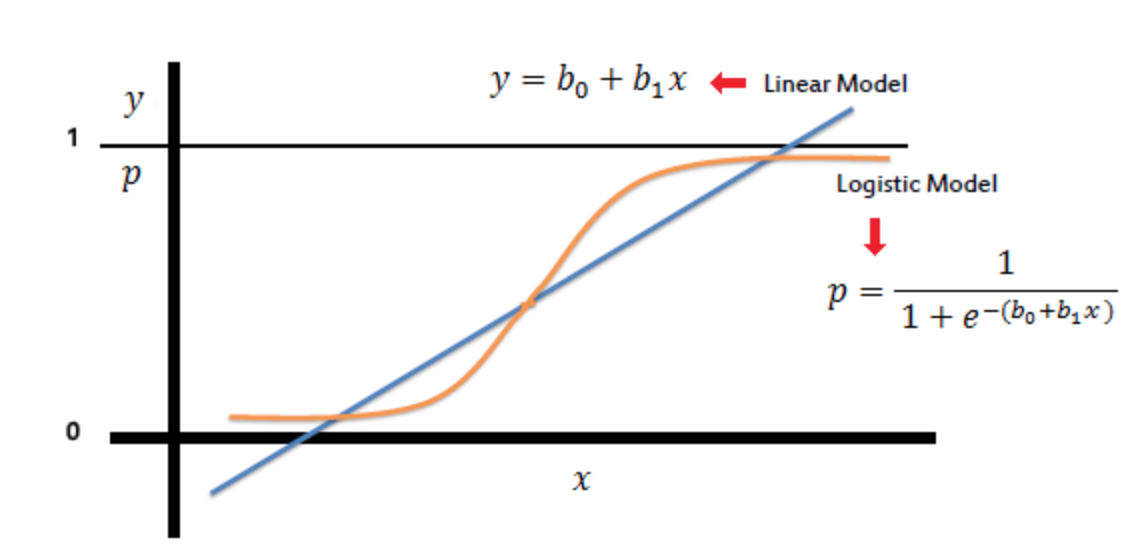

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc

In [55]:
classifier = LogisticRegression()
classifier.fit(X_smote,y_smote)

LogisticRegression()

In [56]:
y_pred_LogisticRegression = classifier.predict(X_test)

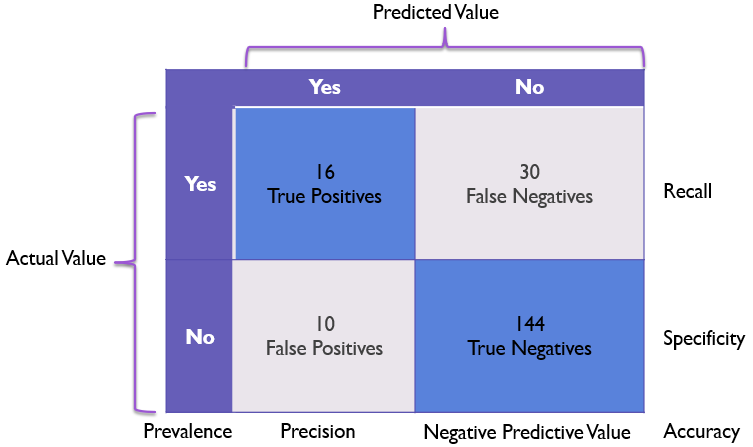

In [57]:
print(classification_report(y_test,y_pred_LogisticRegression))


              precision    recall  f1-score   support

           0       0.89      0.82      0.86     30045
           1       0.55      0.68      0.61      9320

    accuracy                           0.79     39365
   macro avg       0.72      0.75      0.73     39365
weighted avg       0.81      0.79      0.80     39365



In [58]:
confusion_matrix = confusion_matrix(y_test,y_pred_LogisticRegression)
print(confusion_matrix)

[[24774  5271]
 [ 2942  6378]]


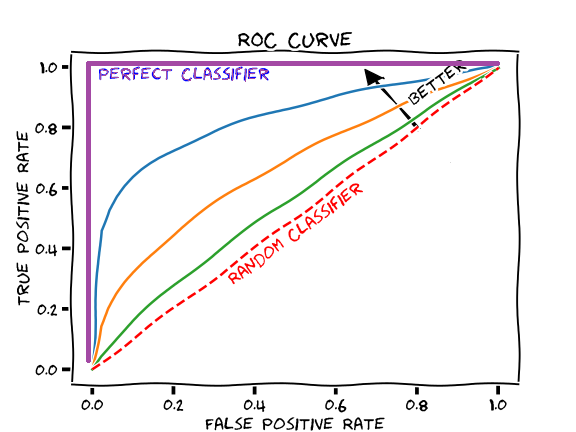

In [59]:
#ROC_AUC SCORE
roc_score=roc_auc_score(y_test,y_pred_LogisticRegression)
print('ROC Score:',roc_score)

ROC Score: 0.7544489596077987


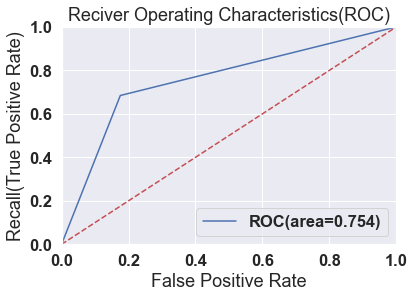

AUC: 0.7544489596077987


In [60]:
#ROC_AUC_Curve:-
sns.set(font_scale=1.5)
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_test,y_pred_LogisticRegression)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

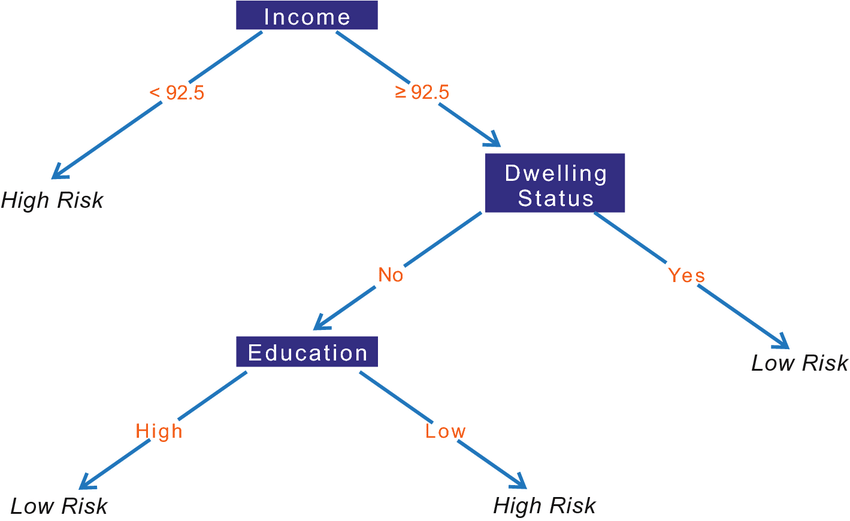

# Decision Tree

In [61]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree


In [62]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=6)
model.fit(X_smote,y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [63]:
model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=2)
model1.fit(X_smote,y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [64]:
fn=['term_woe', 'emp_title_woe', 'verification_status_woe', 'title_woe',
       'zip_code_woe', 'initial_list_status_woe', 'last_week_pay_woe', 'dti',
       'total_rec_int', 'tot_cur_bal', 'total_rev_hi_lim'] #.columns
cn=['1', '0']    #.value_count.keys

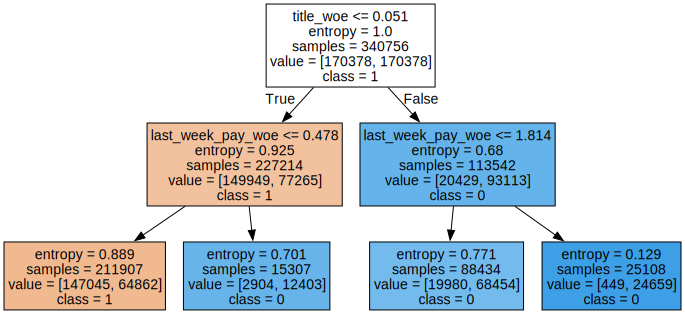

In [65]:
import graphviz

fn=['term_woe', 'emp_title_woe', 'verification_status_woe', 'title_woe',
       'zip_code_woe', 'initial_list_status_woe', 'last_week_pay_woe', 'dti',
       'total_rec_int', 'tot_cur_bal', 'total_rev_hi_lim'] #.columns
cn=['1', '0']    #.value_count.keys
# DOT data
dot_data = tree.export_graphviz(model1, out_file=None, 
                                feature_names=fn,  
                                class_names=cn,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


In [66]:
y_pred_decisiontree = model.predict(X_test)

In [67]:
model.score(X_test,y_test)

0.8146576908421186

In [68]:
roc_score=roc_auc_score(y_test,y_pred_decisiontree)
print('ROC Score:',roc_score)

ROC Score: 0.7575713147017671


# Random Forest

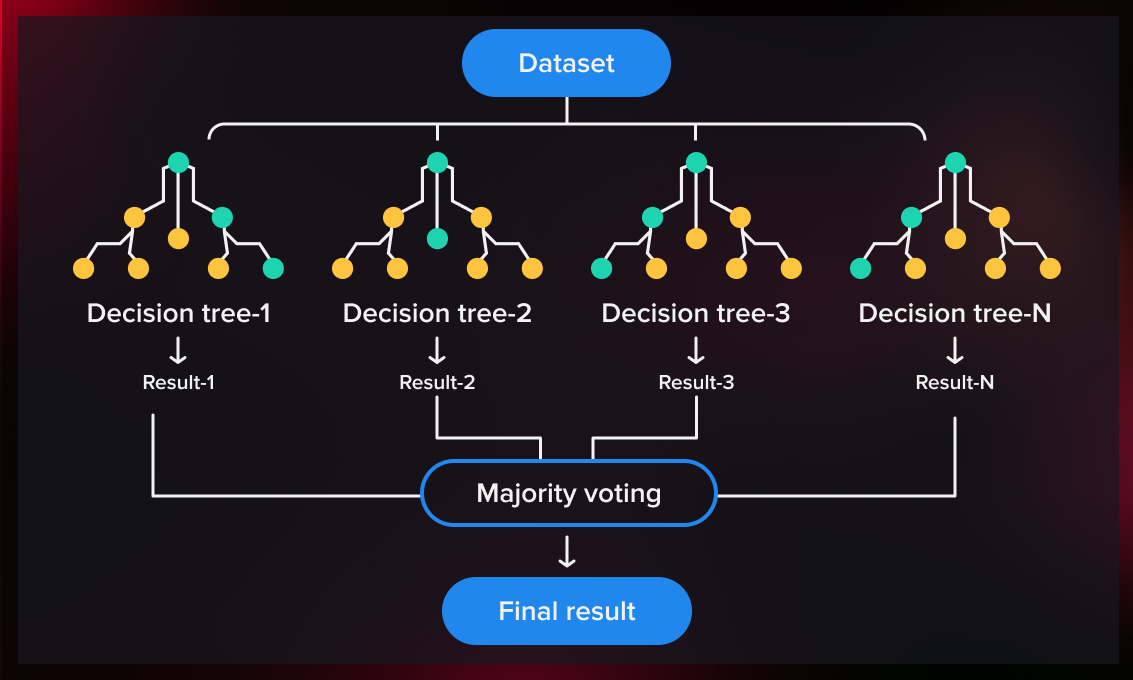

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [94]:
num_trees = 200
max_features = 3
kfold = KFold(n_splits=10) #Bootstrap

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features,random_state=100)

In [95]:
model.fit(X_smote,y_smote)


RandomForestClassifier(max_features=3, n_estimators=200, random_state=100)

In [96]:
y_pred_randomforest = model.predict(X_test)

In [97]:
print(classification_report(y_test,y_pred_randomforest))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     30045
           1       0.71      0.61      0.65      9320

    accuracy                           0.85     39365
   macro avg       0.80      0.76      0.78     39365
weighted avg       0.84      0.85      0.84     39365



In [98]:
roc_score=roc_auc_score(y_test,y_pred_randomforest)
print('ROC Score:',roc_score)

ROC Score: 0.7647601291196253


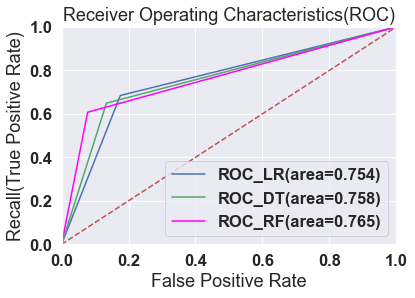

In [100]:
#ROC_AUC_Curve:-
sns.set(font_scale=1.5)
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_test,y_pred_LogisticRegression)
false_positive_rate_DT,recall_DT,thresholds_DT=roc_curve(y_test,y_pred_decisiontree)
false_positive_rate_RF,recall_RF,thresholds_RF=roc_curve(y_test,y_pred_randomforest)
roc_auc_LR=auc(false_positive_rate,recall)
roc_auc_DT=auc(false_positive_rate_DT,recall_DT)
roc_auc_RF=auc(false_positive_rate_RF,recall_RF)
plt.title('Receiver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC_LR(area=%0.3f)' %roc_auc_LR)
plt.plot(false_positive_rate_DT,recall_DT,'g',label='ROC_DT(area=%0.3f)' %roc_auc_DT)
plt.plot(false_positive_rate_RF,recall_RF,'magenta',label='ROC_RF(area=%0.3f)' %roc_auc_RF)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()


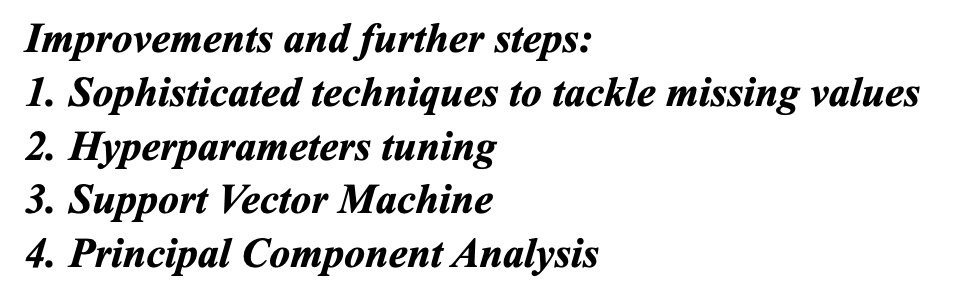